## Análisis de Inspecciones de Consumo en Madrid durante Trimestre 17

Vamos a analizar el fichero de multas del **Ayuntamiento de Madrid**, con información sacada del portal de OPenData : http://datos.madrid.es

Como siempre importamos las librerias necesarias : pandas, numpy y matplotlib:

In [11]:
import pandas as pd

In [12]:
import numpy as np

In [13]:
import matplotlib

In [14]:
import matplotlib.pyplot as plt

In [15]:
import datetime

In [16]:
import matplotlib.dates as mdates

In [17]:
%matplotlib inline

In [18]:
import matplotlib.ticker as mtick

In [19]:
from matplotlib.ticker import FuncFormatter

In [20]:
pd.options.display.float_format = '{:,.1f}'.format

Preparamos una texto para incluirlo en cada gráfico como fuente...

In [21]:
fuente='Fuente : Ayuntamiento de Madrid, http://datos.madrid.es'

Preparando la URL de la fuente de datos

In [22]:
path_web='http://datos.madrid.es/egob/catalogo/300079-2-inspecciones-consumo.csv'

cabecera de las columnas

Leemos los datos desde su localizacion en 'path_web', en este fichero tenemos los datos de Junio de 2017. Al respecto de la la identificacion de la multa en el tiempo tendremos la hora pero no el día del mes, es decir : tendremos las multas puestas a las 13:10 a lo largo de todo el mes, pero no podremos partirlas por día. No encuentro otra razón que no sea evitar cualquier vía de identificación del conductor.

In [30]:
inspecciones=pd.read_csv(path_web,sep=";",encoding='windows-1250',index_col=False)

confirmamos que ha bajado correctamente, viendo el nº de registros (nº de inspecciones)

In [31]:
len(inspecciones)

5845

In [32]:
inspecciones.columns

Index(['FECHA_DE_INSPECCION', 'DISTRITO', 'TIPO_VIAL_ACCESO_PRINCIPAL',
       'NOMBRE_VIA_ACCESO_PRINCIPAL', 'NUMERO_VIA_ACCESO_PRINCIPAL',
       'ACTIVIDAD_INSPECTORA', 'AMBITO', 'EPIGRAFE', 'Unnamed: 8'],
      dtype='object')

Qué es esa columna llamada **'Unnamed: 8'**?. Tiene toda la pinta de ser un error de carga del fichero. Comprobémoslo, y borrémosla si así es :  

In [37]:
inspecciones['Unnamed: 8'].head(10)

0   nan
1   nan
2   nan
3   nan
4   nan
5   nan
6   nan
7   nan
8   nan
9   nan
Name: Unnamed: 8, dtype: float64

In [38]:
inspecciones.drop('Unnamed: 8',axis=1,inplace=True)

In [40]:
inspecciones.columns

Index(['FECHA_DE_INSPECCION', 'DISTRITO', 'TIPO_VIAL_ACCESO_PRINCIPAL',
       'NOMBRE_VIA_ACCESO_PRINCIPAL', 'NUMERO_VIA_ACCESO_PRINCIPAL',
       'ACTIVIDAD_INSPECTORA', 'AMBITO', 'EPIGRAFE'],
      dtype='object')

Veamos una muestra (las cinco primeras filas) del tipo de datos que nos encontramos :

In [42]:
inspecciones.head(5)

,FECHA_DE_INSPECCION,DISTRITO,TIPO_VIAL_ACCESO_PRINCIPAL,NOMBRE_VIA_ACCESO_PRINCIPAL,NUMERO_VIA_ACCESO_PRINCIPAL,ACTIVIDAD_INSPECTORA,AMBITO,EPIGRAFE
0,02/01/2017,06 - TETUAN,CL,ORENSE,69,10 - Inspección,10 - Consumo,951001 - REPARACION DE ORDENADORES Y EQUIPOS D...
1,02/01/2017,20 - SAN BLAS - CANILLEJAS,CL,RUMANIA,18,10 - Inspección,10 - Consumo,475206 - COMERCIO AL POR MENOR DE MATERIAL ELE...
2,02/01/2017,20 - SAN BLAS - CANILLEJAS,CL,RUMANIA,16,10 - Inspección,10 - Consumo,475906 - COMERCIO AL POR MENOR DE APARATOS DE ...
3,02/01/2017,13 - PUENTE VALLECAS,AV,ALBUFERA,0,10 - Inspección,10 - Consumo,47800106 - SITUADOS: ARTICULOS NAVIDEŃOS NO AL...
4,02/01/2017,13 - PUENTE VALLECAS,AV,ALBUFERA,0,10 - Inspección,10 - Consumo,"47800108 - SITUADOS: COMPLEMENTOS, BISUTERIA Y..."


Reformateamos la columna de **FECHA_DE_INSPECCION** para convertirlo en `datetime`

In [43]:
inspecciones['FECHA_DE_INSPECCION']=pd.to_datetime(inspecciones['FECHA_DE_INSPECCION'],format='%d/%m/%Y')

Empecemos con unos gráficos: nº de **inspecciones** por distritos :

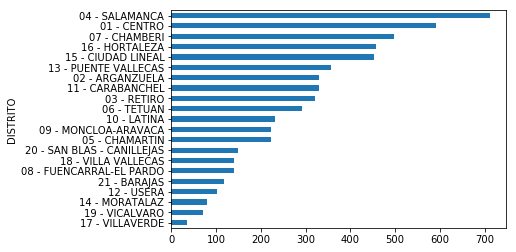

In [63]:
inspecciones.groupby('DISTRITO').size().sort_values().plot.barh()

Contruyamos ahora unas tablas, la *primera* con el top 20 de direcciones con más inspecciones, y la *segunda* con el top de inspecciones en el distrito con más inspecciones : **Barrio Salamanca**

In [47]:
inspecciones.groupby(['NOMBRE_VIA_ACCESO_PRINCIPAL','NUMERO_VIA_ACCESO_PRINCIPAL']).size().sort_values(ascending=False).head(20)

NOMBRE_VIA_ACCESO_PRINCIPAL  NUMERO_VIA_ACCESO_PRINCIPAL
ESTACION DE HORTALEZA        0                              142
AREQUIPA                     1                              127
LAS AGUILAS                  0                               99
CAMPILLO DEL MUNDO NUEVO     0                               97
CALDERILLA                   1                               93
MONFORTE DE LEMOS            30                              73
ARACNE                       3                               69
ALCALA                       412                             56
FLORIDA                      2                               48
ADOLFO BIOY CASARES          2                               42
CASTELLANA                   204                             39
ARTURO SORIA                 126                             36
AYERBE                       0                               30
CLAUDIO MOYANO               0                               26
GENERAL PERON                40                

In [46]:
inspecciones[inspecciones['DISTRITO']=='04 - SALAMANCA'].groupby(['NOMBRE_VIA_ACCESO_PRINCIPAL','NUMERO_VIA_ACCESO_PRINCIPAL']).size().sort_values(ascending=False).head(20)

NOMBRE_VIA_ACCESO_PRINCIPAL  NUMERO_VIA_ACCESO_PRINCIPAL
ALCALA                       237                            19
CLAUDIO COELLO               88                             10
AMERICA                      4                               9
HERMOSILLA                   26                              8
BOCANGEL                     1                               8
CLAUDIO COELLO               38                              7
BRUSELAS                     60                              7
TOREROS                      24                              6
BRUSELAS                     63                              6
MARQUES DE ZAFRA             9                               6
BRUSELAS                     41                              6
GOYA                         17                              6
LAGASCA                      88                              6
DON RAMON DE LA CRUZ         17                              6
SERRANO                      61                              

Os preguntáis qué hay en [Alcalá, 237](https://www.google.es/maps/place/Calle+de+Alcalá,+237,+28028+Madrid/@40.4315852,-3.6650519,17z/data=!3m1!4b1!4m5!3m4!1s0xd4228b4d0c19fa7:0xd687677872669167!8m2!3d40.4315811!4d-3.6628632) ??. Y [en Estación de Hortaleza, 0](https://www.google.es/maps/place/Ctra.+la+Estacion+de+Hortaleza,+0,+28033+Madrid/@40.4769833,-3.6565148,16.96z/data=!4m5!3m4!1s0xd422eb7b736a465:0xd7f6977d53d5624!8m2!3d40.476989!4d-3.654247) ??..en este caso no es inmediato, pero podremos comprobar que se refiere al Mercado Dominical de Hortaleza

Veamos en qué días se realizan esas inspecciones : 

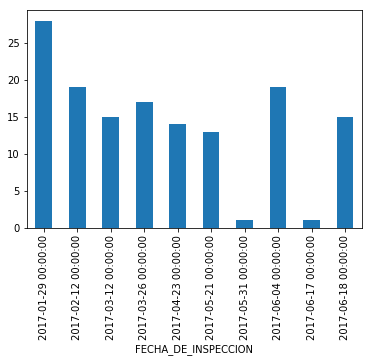

In [50]:
inspecciones[inspecciones['NOMBRE_VIA_ACCESO_PRINCIPAL']=='ESTACION DE HORTALEZA'].groupby(['FECHA_DE_INSPECCION']).size().plot.bar()

Vemos que esos días se corresponden con **Domingo**

A continuación veamos la diestribución por meses...(1-> Enero, 2->Febrero, ......)

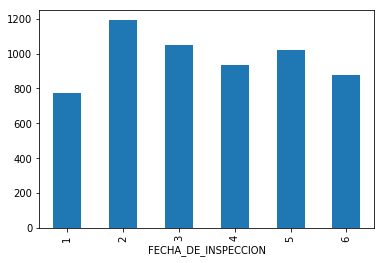

In [53]:
inspecciones.groupby([inspecciones["FECHA_DE_INSPECCION"].dt.month]).size().plot(kind="bar")

Por semanas : 

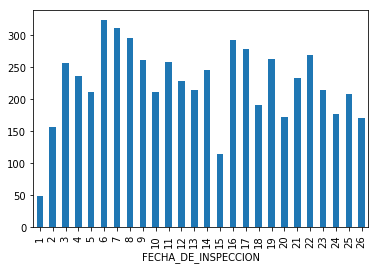

In [54]:
inspecciones.groupby([inspecciones["FECHA_DE_INSPECCION"].dt.week]).size().plot(kind="bar")

La semana 15 coincidió con la **Semana Santa**

In [ ]:
...y finalmente la distribución por días : 

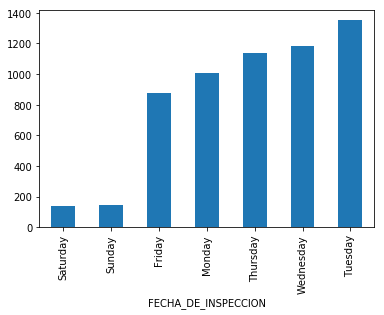

In [58]:
inspecciones.groupby([inspecciones["FECHA_DE_INSPECCION"].dt.weekday_name]).size().sort_values().plot(kind="bar")

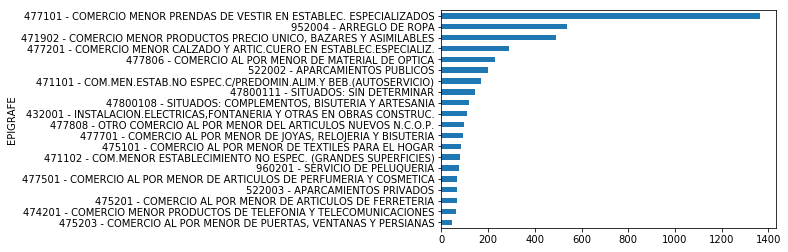

In [66]:
inspecciones.groupby(['EPIGRAFE']).size().sort_values(ascending=True).tail(20).plot.barh()

In [85]:
inspecciones['ACTIVIDAD_INSPECTORA'].unique()

array(['10 - Inspección', '30 - Control de Productos',
       '20 - Otros Controles Oficiales'], dtype=object)

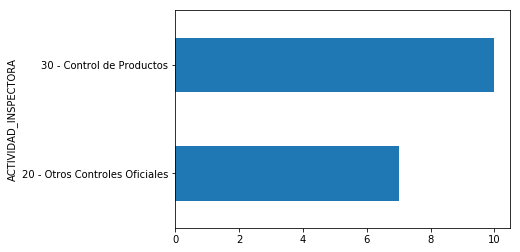

In [88]:
inspecciones.groupby(['ACTIVIDAD_INSPECTORA']).size().sort_values(ascending=True).head(2).plot.barh()

In [95]:
inspecciones[inspecciones['ACTIVIDAD_INSPECTORA']=='30 - Control de Productos']

,FECHA_DE_INSPECCION,DISTRITO,TIPO_VIAL_ACCESO_PRINCIPAL,NOMBRE_VIA_ACCESO_PRINCIPAL,NUMERO_VIA_ACCESO_PRINCIPAL,ACTIVIDAD_INSPECTORA,AMBITO,EPIGRAFE
159,2017-01-19,12 - USERA,CL,MARIBLANCA,11,30 - Control de Productos,10 - Consumo,471104 - COM.MENOR PRODUCTOS ALIMENTICIOS NO P...
313,2017-01-23,01 - CENTRO,CL,GRAN VIA,29,30 - Control de Productos,10 - Consumo,476101 - COMERCIO AL POR MENOR DE LIBROS
613,2017-02-02,21 - BARAJAS,CL,AGUETOL,8,30 - Control de Productos,10 - Consumo,471901 - COM.MENOR ESTABL.NO ESPEC.S/PREDOMINI...
1199,2017-01-09,07 - CHAMBERI,CL,RIOS ROSAS,2,30 - Control de Productos,10 - Consumo,475901 - COMERCIO AL POR MENOR DE MUEBLES
1489,2017-02-24,01 - CENTRO,CL,FUENCARRAL,94,30 - Control de Productos,10 - Consumo,477808 - OTRO COMERCIO AL POR MENOR DEL ARTICU...
1495,2017-02-24,01 - CENTRO,CL,FUENCARRAL,94,30 - Control de Productos,10 - Consumo,477808 - OTRO COMERCIO AL POR MENOR DEL ARTICU...
1498,2017-02-24,01 - CENTRO,CL,FUENCARRAL,94,30 - Control de Productos,10 - Consumo,477808 - OTRO COMERCIO AL POR MENOR DEL ARTICU...
1503,2017-02-24,01 - CENTRO,CL,FUENCARRAL,94,30 - Control de Productos,10 - Consumo,477808 - OTRO COMERCIO AL POR MENOR DEL ARTICU...
2595,2017-01-21,10 - LATINA,AV,LAS AGUILAS,0,30 - Control de Productos,10 - Consumo,477101 - COMERCIO MENOR PRENDAS DE VESTIR EN E...
5018,2017-05-31,08 - FUENCARRAL-EL PARDO,AV,MONFORTE DE LEMOS,30,30 - Control de Productos,10 - Consumo,476501 - COMERCIO AL POR MENOR DE JUEGOS Y JUG...
